# Loading packages

In [1]:
import numpy as np
import pandas as pd
import glob

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from pandas.api.types import CategoricalDtype

# Loading data

In [4]:
data= pd.read_pickle("../data/modified_exclusions/pt_replication_modified_exclusions_data.pkl")

In [5]:
data.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', 'Gender', 'Age', 'Personal_Income',
       'Financial_Situation', 'Bill_Payments', 'Education', 'Credit_Debt',
       'Additional_Income_Private_Investment', 'Additional_Income_Property',
       'Additional_Income_Business_Ownership',
       'Additional_Income_Retirement_Plan', 'Loss_Awareness', 'Loss_Intuition',
       'Country', 'Duration_in_seconds', 'Language', 'Sample',
       'Duration_Minutes', 'YoB', 'Awareness_of_Loss_Aversion',
       'Financial_Stress', 'Presentation_Order'],
      dtype='object')

### Preparing variables for R (Z-scoring and dummy coding)

In [6]:
data["Gender"].value_counts()

Female    2077
Male      1948
Other       26
Name: Gender, dtype: int64

In [7]:
data["Men"] = 1
data.loc[data["Gender"]=="Female", "Men"] = 0
data.loc[data["Gender"]=="Other", "Men"] = np.nan

In [8]:
data["Loss_Awareness"].value_counts()

0    2733
1    1365
Name: Loss_Awareness, dtype: int64

In [9]:
data["Loss_Intuition"].value_counts()

1.0    2209
0.0     396
Name: Loss_Intuition, dtype: int64

In [11]:
data.loc[data["Loss_Awareness"]==1, "Loss_Intuition"] = 0

In [12]:
data["Loss_Intuition"].value_counts()

1.0    2209
0.0    1761
Name: Loss_Intuition, dtype: int64

### Z-scoring age by country

In [14]:
mean_ages = data.groupby("Country")["Age"].mean()
std_ages = data.groupby("Country")["Age"].std()

In [15]:
age_country_indexed = data.set_index("Country", append=True)["Age"]
z_age = (age_country_indexed - mean_ages)/std_ages
z_age = z_age.reset_index()
data["Z_Age"] = z_age.set_index('level_0')["Age"]

### Z-scoring income by country

In [17]:
mean_incomes = data.groupby("Country")["Personal_Income"].mean()
std_incomes = data.groupby("Country")["Personal_Income"].std()

In [18]:
income_country_indexed = data.set_index("Country", append=True)["Personal_Income"]
z_income = (income_country_indexed - mean_incomes)/std_incomes
z_income = z_income.reset_index()
data["Z_Income"] = z_income.set_index('level_0')["Personal_Income"]

### Recoding factors

In [19]:
data['Financial_Situation'].value_counts(sort=False)

Became much worse          225
Became a little worse      666
Has not changed           1949
Became a little better    1001
Became much better         257
Name: Financial_Situation, dtype: int64

In [20]:
data['Bill_Payments'].value_counts()

I paid everything but saved nothing                                          1180
Everything is paid off and I have enough to save, invest, or spend freely    1079
I paid everything and saved some                                              993
I paid everything, saved some, and paid down other debts                      503
I had to take on some debt to pay them                                        150
I could not pay all my bills last month                                       148
I had to take on a lot of debt to pay bills last month                         45
Name: Bill_Payments, dtype: int64

In [21]:
data['Education'].value_counts(sort=False)

Primary school                36
Secondary school             781
Vocational school            518
University Undergraduate    1481
University Masters          1020
University MBA               137
University PhD               105
Name: Education, dtype: int64

In [22]:
data['Education'] = data['Education'].astype(str)
data.loc[data["Education"].isin(["Primary school", "Secondary school"]), "Education"] = "basic"
data.loc[data["Education"].isin(["Vocational school"]), "Education"] = "vocational"
data.loc[data["Education"].isin(["University Undergraduate"]), "Education"] = "undergraduate"
data.loc[data["Education"].isin(["University Masters", "University MBA", "University PhD"]), "Education"] = "postgraduate"

In [23]:
data['Education'].value_counts()

undergraduate    1481
postgraduate     1262
basic             817
vocational        518
nan                20
Name: Education, dtype: int64

In [24]:
data.loc[data["Education"]=="nan", "Education"] = np.nan

In [25]:
data['Bill_Payments'].value_counts(sort=False)

I could not pay all my bills last month                                       148
I had to take on a lot of debt to pay bills last month                         45
I had to take on some debt to pay them                                        150
I paid everything but saved nothing                                          1180
I paid everything and saved some                                              993
I paid everything, saved some, and paid down other debts                      503
Everything is paid off and I have enough to save, invest, or spend freely    1079
Name: Bill_Payments, dtype: int64

In [26]:
data['Bill_Payments'] = data['Bill_Payments'].astype(str)
data.loc[data['Bill_Payments'].isin(["I could not pay all my bills last month"]), 'Bill_Payments'] = "failed_to_pay"
data.loc[data['Bill_Payments'].isin(["I had to take on a lot of debt to pay bills last month",
                                    "I had to take on some debt to pay them"]), 'Bill_Payments'] = "debt_to_pay"
data.loc[data['Bill_Payments'].isin(["I paid everything but saved nothing"]), 'Bill_Payments'] = "payed_no_save"
data.loc[data['Bill_Payments'].isin(["I paid everything and saved some",
                                    "I paid everything, saved some, and paid down other debts"]), 'Bill_Payments'] = "payed_some_save"
data.loc[data['Bill_Payments'].isin(["Everything is paid off and I have enough to save, invest, or spend freely"]), 'Bill_Payments'] = "payed_spend_free"

In [27]:
data['Bill_Payments'].value_counts(sort=False)

payed_spend_free    1079
payed_no_save       1180
failed_to_pay        148
debt_to_pay          195
payed_some_save     1496
Name: Bill_Payments, dtype: int64

In [28]:
data['Financial_Situation'].value_counts(sort=False)

Became much worse          225
Became a little worse      666
Has not changed           1949
Became a little better    1001
Became much better         257
Name: Financial_Situation, dtype: int64

In [29]:
data['Financial_Situation'] = data['Financial_Situation'].astype(str)
data.loc[data['Financial_Situation'].isin(["Became much worse"]), 'Financial_Situation'] = "much_worse"
data.loc[data['Financial_Situation'].isin(["Became a little worse"]), 'Financial_Situation'] = "little_worse"
data.loc[data['Financial_Situation'].isin(["Has not changed"]), 'Financial_Situation'] = "unchanged"
data.loc[data['Financial_Situation'].isin(["Became a little better"]), 'Financial_Situation'] = "little_better"
data.loc[data['Financial_Situation'].isin(["Became much better"]), 'Financial_Situation'] = "much_better"

In [30]:
data['Financial_Situation'].value_counts(sort=False)

little_worse      666
much_worse        225
unchanged        1949
much_better       257
little_better    1001
Name: Financial_Situation, dtype: int64

### Sanity check that bill-payments are associated with income

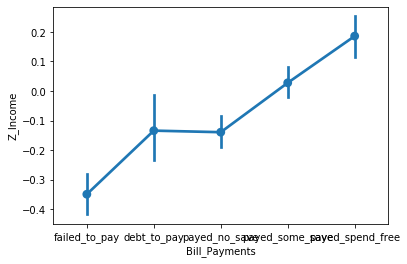

In [31]:
sns.pointplot(data=data, x="Bill_Payments", y="Z_Income", order=["failed_to_pay", "debt_to_pay", "payed_no_save",
                                                                "payed_some_save", "payed_spend_free"])

### Relabel items for easier access in base R

In [32]:
data = data.rename(columns=dict(zip(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17'], ["Item_" + i for i in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17']])))

In [33]:
data.columns

Index(['Item_1', 'Item_2', 'Item_3', 'Item_4', 'Item_5', 'Item_6', 'Item_7',
       'Item_8', 'Item_9', 'Item_10', 'Item_11', 'Item_12', 'Item_13',
       'Item_14', 'Item_15', 'Item_16', 'Item_17', 'Gender', 'Age',
       'Personal_Income', 'Financial_Situation', 'Bill_Payments', 'Education',
       'Credit_Debt', 'Additional_Income_Private_Investment',
       'Additional_Income_Property', 'Additional_Income_Business_Ownership',
       'Additional_Income_Retirement_Plan', 'Loss_Awareness', 'Loss_Intuition',
       'Country', 'Duration_in_seconds', 'Language', 'Sample',
       'Duration_Minutes', 'YoB', 'Awareness_of_Loss_Aversion',
       'Financial_Stress', 'Presentation_Order', 'Men', 'Loss Intuition',
       'Z_Age', 'Z_Income'],
      dtype='object')

### Check that Z age and Z income has complete values

In [38]:
data["Z_Age"].count()

4098

In [39]:
data.loc[data["Z_Age"].isna(), ["Country", "Age"]]

,Country,Age


In [40]:
data["Z_Income"].count()

4098

### Create a participant ID variable

In [45]:
data["ParID"] = np.arange(len(data))

### Check that loss intuition can only be true when loss awareness is false

In [42]:
data.loc[data["Loss_Intuition"].isna(), "Loss_Intuition"] = 0

In [43]:
data.groupby(["Loss_Awareness", "Loss_Intuition"])["Awareness_of_Loss_Aversion"].value_counts()

Loss_Awareness  Loss_Intuition  Awareness_of_Loss_Aversion
0               0.0             4                              396
                                2                              128
                1.0             3                             2209
1               0.0             1                             1365
Name: Awareness_of_Loss_Aversion, dtype: int64

# Creating a new dataframe for the Bayesian models

In [47]:
bayes_data = data[['Item_1', 'Item_2', 'Item_3', 'Item_4', 'Item_5', 'Item_6', 'Item_7',
       'Item_8', 'Item_9', 'Item_10', 'Item_11', 'Item_12', 'Item_13',
       'Item_14', 'Item_15', 'Item_16', 'Item_17', "ParID", 'Country',
      'Men', 'Z_Age', 'Z_Income', 'Financial_Situation', 'Bill_Payments',
       'Education', 'Loss_Awareness', 'Loss_Intuition']]

In [48]:
bayes_data = bayes_data.loc[bayes_data["Men"].notna(), :]

In [49]:
bayes_data = bayes_data.loc[bayes_data["Education"].notna(), :]

In [50]:
bayes_data.count()

Item_1                 4052
Item_2                 4052
Item_3                 4052
Item_4                 4052
Item_5                 4052
Item_6                 4052
Item_7                 4052
Item_8                 4052
Item_9                 4052
Item_10                4052
Item_11                4052
Item_12                4052
Item_13                4052
Item_14                3831
Item_15                4008
Item_16                4052
Item_17                4052
ParID                  4052
Country                4052
Men                    4052
Z_Age                  4052
Z_Income               4052
Financial_Situation    4052
Bill_Payments          4052
Education              4052
Loss_Awareness         4052
Loss_Intuition         4052
dtype: int64

In [51]:
bayes_data.to_csv("../output/bayes_data.csv", index=False)